In [59]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

In [3]:
train = pd.read_csv("tmdb-box-office-prediction/train.csv")
test = pd.read_csv("tmdb-box-office-prediction/test.csv")

In [4]:
len(test)

4398

In [5]:
# get the datatypes of all columns
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [6]:
len(train)

3000

In [7]:
# check for null values
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

# Data preprocessing

In [8]:
# turn homepage into a binary column
len(train[train['homepage'].isna()])

2054

In [9]:
fn = lambda row: 0 if pd.isnull(row.homepage) else 1

In [10]:
train['homepage'] = train.apply(fn, axis=1)

In [11]:
train['original_language'] = train['original_language'].astype('category')

In [12]:
# check status column value types
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [13]:
train['status'] = train['status'].astype('category')

In [14]:
train['release_date'].head()

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

In [15]:
train['release_date'] = pd.to_datetime(train['release_date'])

In [16]:
train.iloc[0].release_date.year

2015

In [17]:
# get just the year of the movie
train['release_date'] = [row.year for row in train['release_date']]

In [81]:
train.release_date.value_counts()[:10]

2013    141
2015    128
2010    126
2012    125
2016    125
2011    124
2014    123
2006    114
2009    106
2007    105
Name: release_date, dtype: int64

In [18]:
train['release_date'] = train['release_date'].astype('category')

In [83]:
train.dtypes

id                          int64
belongs_to_collection      object
budget                      int64
genres                     object
homepage                    int64
imdb_id                    object
original_language        category
original_title             object
overview                   object
popularity                float64
poster_path                object
production_companies       object
production_countries       object
release_date             category
runtime                   float64
spoken_languages           object
status                   category
tagline                    object
title                      object
Keywords                   object
cast                       object
crew                       object
revenue                     int64
dtype: object

# Model building

In [48]:
train_nonull = train.drop(['imdb_id', 'cast', 'crew', 'Keywords', 
                'spoken_languages', 'poster_path', 'production_companies', 'production_countries', 'tagline',
                'title', 'overview', 'original_title', 
                'genres', 'belongs_to_collection'], axis=1).dropna()

In [49]:
len(train_nonull)

2998

In [50]:
X = train_nonull.drop(['revenue'], axis=1)
y = train_nonull['revenue']

In [51]:
X.isnull().sum()

id                   0
budget               0
homepage             0
original_language    0
popularity           0
release_date         0
runtime              0
status               0
dtype: int64

In [208]:
# use label encoder
columns = ['original_language', 'status', 'release_date']
le = LabelEncoder()
for col in columns:
    X[col] = le.fit_transform(X[col])

In [53]:
X_dict = X.to_dict(orient='records')
dv_X = DictVectorizer(sparse=False)
X_encoded = dv_X.fit_transform(X_dict)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [210]:
len(X)

2998

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
regr = RandomForestRegressor(n_estimators=30, random_state=42)

In [211]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [212]:
regr.score(X_test, y_test)

0.6476615717426775

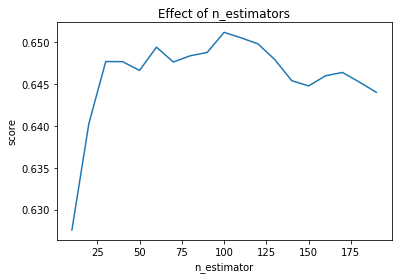

In [213]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    regr.set_params(n_estimators=n)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

# Make Predictions on Test Data

In [175]:
# import test data
test = pd.read_csv("tmdb-box-office-prediction/test.csv")

In [176]:
len(test)

4398

In [161]:
test.drop(['imdb_id', 'cast', 'crew', 'Keywords', 
                'spoken_languages', 'poster_path', 'production_companies', 'production_countries', 'tagline',
                'title', 'overview', 'original_title', 
                'genres', 'belongs_to_collection'], axis=1).isnull().sum()

id                      0
budget                  0
homepage             2978
original_language       0
popularity              0
release_date            1
runtime                 4
status                  2
dtype: int64

In [177]:
print(test.runtime.mean())
print(test.release_date.mode())

107.6222121074192
0    9/9/11
dtype: object


In [178]:
# preprocess the test data
fn = lambda row: 0 if pd.isnull(row.homepage) else 1
test['homepage'] = test.apply(fn, axis=1)
test['original_language'] = test['original_language'].astype('category')
test['status'] = test['status'].astype('category')
test.fillna({'release_date': test['release_date'].mode()}, inplace=True)
#test['release_date'].fillna(test['release_date'].mode(), inplace=True)
test['release_date'] = pd.to_datetime(test['release_date'])
test['release_date'] = [row.year for row in test['release_date']]
test['release_date'] = test['release_date'].astype('category')
test['status'].fillna('Released', inplace=True)
test['runtime'].fillna(test['runtime'].mean(), inplace=True)
test_nonull = test.drop(['imdb_id', 'cast', 'crew', 'Keywords', 
                'spoken_languages', 'poster_path', 'production_companies', 'production_countries', 'tagline',
                'title', 'overview', 'original_title', 
                'genres', 'belongs_to_collection'], axis=1)

In [179]:
test_nonull.loc[test.isnull().any(axis=1), 'release_date'] = 2014

In [191]:
print("test set size: ", len(test_nonull))
test_nonull.isnull().sum()

test set size:  4398


id                   0
budget               0
homepage             0
original_language    0
popularity           0
release_date         0
runtime              0
status               0
dtype: int64

In [205]:
# use label encoder
columns = ['original_language', 'status', 'release_date']
le = LabelEncoder()
for col in columns:
    test_nonull[col] = le.fit_transform(test_nonull[col])

In [206]:
test_nonull.head()

,id,budget,homepage,original_language,popularity,release_date,runtime,status
0,3001,0,1,19,3.851534,44,90.0,1
1,3002,88000,0,9,3.559789,44,65.0,1
2,3003,0,0,9,8.085194,44,100.0,1
3,3004,6800000,1,12,8.596012,44,130.0,1
4,3005,2000000,0,9,3.217680,44,92.0,1


In [202]:
Xtest_encoded.shape

(4398, 48)

In [214]:
Xtest = test_nonull

In [215]:
regr.predict(Xtest)

array([1.05161152e+07, 6.61143184e+06, 1.84504297e+07, ...,
       1.13793027e+08, 2.93875170e+07, 2.88574105e+07])

In [216]:
preds = pd.Series(regr.predict(Xtest))

In [217]:
len(preds)

4398

In [220]:
test_nonull.head()

,id,budget,homepage,original_language,popularity,release_date,runtime,status
0,3001,0,1,19,3.851534,44,90.0,1
1,3002,88000,0,9,3.559789,44,65.0,1
2,3003,0,0,9,8.085194,44,100.0,1
3,3004,6800000,1,12,8.596012,44,130.0,1
4,3005,2000000,0,9,3.217680,44,92.0,1


In [221]:
preds = regr.predict(Xtest)

In [226]:
d = {'id': test_nonull['id'].values, 'revenue': preds}
results = pd.DataFrame(d)

In [227]:
# save results to csv
results.to_csv("results.csv", header=True, index=False)